In [7]:
import sys 
sys.path.append("..") 

#from topological_models import generator
import numpy as np
import numpy.linalg as LA

from topology_model import NonHermitianHamiltonian, NonHermitianTopologicalModel
import matplotlib.pyplot as plt
from machine_learning import Cluster
from machine_learning import Classifier
from topology_model import sigma_0, sigma_x, sigma_y, sigma_z
from topology_model import Generator
from topology_model import topology_comparator, topology_verifier

$PT$-symmetry

In [20]:
class LossGain1D(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)
        self.parameters = list()
        self.initiate()

    def get_n(self):
        '''
        n*n Hamiltonian
        '''
        return 4

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.parameters

    def set_parameters(self, **kwargs):
        self.parameters = kwargs['kappa'], kwargs['g1'], kwargs['g2']

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)]
        return kpoints

    def initiate(self):
        # different parameter region for the different gap type
        kappa = 1.
        g1 = -3 + 6*np.random.random()
        #gamma = 3*np.random.random()
        g2 = -3 + 6*np.random.random()

        self.parameters = kappa, g1, g2

    def is_real_line_gap(self):
        kappa, g1, g2 = self.parameters
        # if not ((t1 >= t2 + gamma/2) 
        #         or (t1 <= -t2 - gamma/2) 
        #         or ((t1 >= t2 - gamma/2) and (t1 <= -t2 + gamma/2)) 
        #         or ((t1 <= t2 - gamma/2) and (t1 >= -t2 + gamma/2))):
        #     return False
        hk = self.get_Hamiltonian([0])
        Es = LA.eigvals(hk)
        #print(np.abs(np.real(Es)))
        if np.any(np.abs(np.real(Es)) < 1e-3):
            return False
        return True  
    
    def is_imaginary_line_gap(self):
        return not self.is_real_line_gap()
    
    def get_Hamiltonian(self, k):
        k = k[0]
        #hk = np.zeros((4,4), dtype=complex)
        kappa, g1, g2 = self.parameters
        
        hk = np.array([
            [1j*g1, kappa, 0, kappa*np.exp(-1j*k)],
            [kappa, -1j*g2, kappa, 0],
            [0, kappa, -1j*g1, kappa],
            [kappa*np.exp(1j*k), 0, kappa, 1j*g2]
        ], dtype=complex)
        hk = hk - self.E_ref*np.identity(4)

        return hk
    
class SSH1DPerturbation(NonHermitianHamiltonian):
    def __init__(self, E_ref=0.):
        super().__init__(E_ref)
        self.parameters = list()
        self.initiate()

    def get_n(self):
        '''
        n*n Hamiltonian
        '''
        return 4

    def get_n_dim(self):
        return 1

    def get_parameters(self):
        return self.parameters

    def set_parameters(self, **kwargs):
        self.parameters = kwargs['kappa'], kwargs['g1'], kwargs['g2']

    def get_kpoints(self):
        n_points = 11
        kpoints = [[k] for k in np.linspace(0,np.pi,n_points)]
        return kpoints

    def initiate(self):
        # different parameter region for the different gap type
        kappa = -1 + 2*np.random.random()
        g1 = -1 + 2*np.random.random()
        g2 = -1 + 2*np.random.random()
        self.parameters = kappa, g1, g2
    
    def get_Hamiltonian(self, k):
        k = k[0]
        kappa, g1, g2 = self.parameters
        hk = np.array([
            [1j*g1, kappa, 0, kappa*np.exp(-1j*k)],
            [kappa, -1j*g2, kappa, 0],
            [0, kappa, -1j*g1, kappa],
            [kappa*np.exp(1j*k), 0, kappa, 1j*g2]
        ], dtype=complex)
        hk = hk - self.E_ref*np.identity(4)
        hk = hk*0.1

        return hk

True


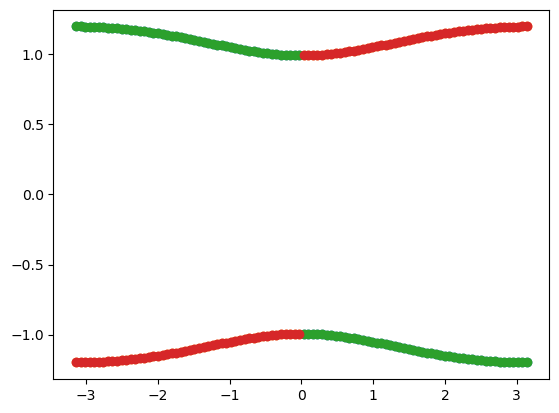

In [21]:
# n_ks = 100
# ks = np.linspace(-np.pi, np.pi, n_ks)
# Es = np.zeros((n_ks, 4),dtype=complex)
# hamiltonian_model = LossGain1D(E_ref=0.0)
# #print(hamiltonian_model.get_parameters())
# print(hamiltonian_model.is_real_line_gap())

# for ik, k in enumerate(ks):
#     _E = LA.eigvals(hamiltonian_model.get_Hamiltonian([k]))
#     Es[ik] = _E

# plt.figure()
# for ib in range(4):
#     plt.scatter(ks, np.real(Es[:,ib]))

p1 [[[ 0.5  -0.023j -0.262-0.23j   0.023-0.004j -0.192+0.304j]
  [-0.262+0.23j   0.5  +0.023j -0.277-0.23j   0.023-0.004j]
  [-0.023-0.004j -0.277+0.23j   0.5  +0.023j -0.262-0.23j ]
  [-0.192-0.304j -0.023-0.004j -0.262+0.23j   0.5  -0.023j]]]
[[[ 0.   +0.045j  0.524+0.46j  -0.046+0.007j  0.384-0.609j]
  [ 0.524-0.46j   0.   -0.045j  0.554+0.46j  -0.046+0.007j]
  [ 0.046+0.007j  0.554-0.46j  -0.   -0.045j  0.524+0.46j ]
  [ 0.384+0.609j  0.046+0.007j  0.524-0.46j  -0.   +0.045j]]]
q1: [[ 1.-0.j -1.-0.j -1.+0.j  1.+0.j]]
q2: [[ 1.+0.j -1.+0.j -1.+0.j  1.-0.j]]


/tmp/ipykernel_57510/1504133156.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  lambdas[ia] = LA.eigvals((1-a)*q1+a*q2)


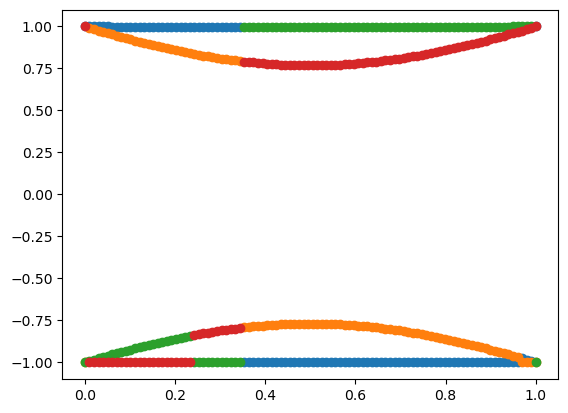

In [22]:
# E_ref = 0.
# gap_type = 'real line'
# model1 = NonHermitianTopologicalModel(LossGain1D(E_ref=E_ref), gap_type=gap_type)
# model1.set_parameters(kappa=1.0, g1=0.1, g2=0.1)
# k = 0.1*np.pi

# # values, Rvectors, Lvectors = model1.get_eigensystem([k])
# # print("values:", values)
# # print("Rvectors", Rvectors)
# p1 = model1.calculate_projection_operator(kpoints=[[k]])
# print("p1", np.around(p1, decimals=3))


# q1 = model1.calculate_Q(kpoints=[[k]])
# print(np.around(q1, decimals=3))
# print("q1:", np.around(LA.eigvals(q1),decimals=3))
               
# model2 = NonHermitianTopologicalModel(LossGain1D(E_ref=E_ref), gap_type=gap_type)
# model2.set_parameters(kappa=1.0, g1=2.0, g2=2.0)
# q2 = model2.calculate_Q(kpoints=[[k]])
# print("q2:", np.around(LA.eigvals(q2),decimals=3))
  
# n_a = 100
# a_s = np.linspace(0,1,n_a)
# lambdas = np.zeros((n_a, 4))
# for ia, a in enumerate(a_s):
#     lambdas[ia] = LA.eigvals((1-a)*q1+a*q2)

# plt.figure()
# for ib in range(4):
#     plt.scatter(a_s, lambdas[:, ib])

In [23]:
gap_type="real line"
E_ref = 0.
hamiltonian_model = LossGain1D(E_ref=E_ref)
generator = Generator(hamiltonian=hamiltonian_model, gap_type=gap_type)

n_sample = 500
_models, vs = generator.generate_models(n_sample)
#Qs, vs = generator.generate(n_sample)
n = generator.get_n()

models = list()
for model in _models:
    if model.is_real_line_gap():
        models.append(model)

print("Number of samples: ", len(models))

Number of samples:  451


In [24]:
cluster = Cluster(similarity_function=topology_comparator, verbose=True)
center_indices, group_number = cluster.fit(models)
print(center_indices)
print(group_number)
print("The number of centers: ", len(center_indices))

Start to cluster data by my own method with the size as [451] with sc = 0.5.
Clustering ... 
A sample with new topological phase detected! [1]
Done. Spend time as [24.078 seconds]
[1 0]
[239 212]
The number of centers:  2


In [25]:
center_models = [models[i] for i in center_indices]

for model in center_models:
    print(model.get_parameters())

E_ref = 0.
hamiltonian_perturbation = SSH1DPerturbation(E_ref=E_ref)
generator = Generator(hamiltonian=hamiltonian_perturbation, gap_type=gap_type)

n_sample = 100
perturbations, vs = generator.generate_models(n_sample)
#Qs, vs = generator.generate(n_sample)
n = generator.get_n()

n_center = len(center_models)
similarity_center = np.zeros((n_center, n_center))
for i in range(n_center):
    for j in range(n_center):
        similarity_center[i,j] = topology_verifier(center_models[i], center_models[j], perturbations)

print(similarity_center)

(1.0, -0.87299086114328, -0.5392544258600154)
(1.0, 1.5437198262501415, -0.19805043800711974)
[[1. 0.]
 [0. 1.]]


In [26]:
classifier = Classifier(similarity_func=topology_comparator, cluster_centers=[models[index] for index in center_indices])

In [29]:
n1 = 52
n2 = 52
g1s = np.linspace(-3,3,n1)
g2s = np.linspace(-3,3,n2)

v_list = list()
g1_list = list()
g2_list = list()

for i in range(n1):
    for j in range(n2):
        hamiltonian = LossGain1D(E_ref=E_ref)
        hamiltonian.set_parameters(kappa=1, g1=g1s[i], g2=g2s[j])
        #print(hamiltonian.get_parameters())
        if hamiltonian.is_real_line_gap():
            _model = NonHermitianTopologicalModel(hamiltonian=hamiltonian, gap_type="real line")
            #v_list.append(1)
            g1_list.append(g1s[i])
            g2_list.append(g2s[j])
            v_list.append(classifier.classify(_model))

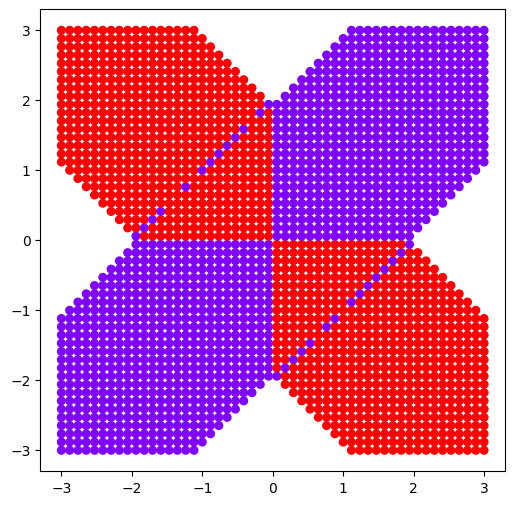

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(g1_list, g2_list, c=v_list, s=30.,cmap='rainbow')
plt.show()